<a href="https://colab.research.google.com/github/wuphwu/IDS/blob/main/%E3%80%8CIntrusion_Detection_System_%5BNSL_KDD%5D%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hassan06_nslkdd_path = kagglehub.dataset_download('hassan06/nslkdd')

print('Data source import complete.')
print(f"資料集下載路徑：{hassan06_nslkdd_path}")


Data source import complete.
資料集下載路徑：/kaggle/input/nslkdd


In [2]:
import os

# 使用下載的路徑來建構檔案的完整路徑
file_path = os.path.join(hassan06_nslkdd_path, 'KDDTrain+.txt')

# Exploring the NSL-KDD Dataset: A Comprehensive Analysis About Intrusion Detection System

## Introduction

In the realm of cybersecurity and network intrusion detection, the NSL-KDD dataset stands as a benchmark for evaluating machine learning models' performance. This dataset, derived from the original KDD Cup 1999 dataset, addresses the limitations and biases present in its predecessor, making it a vital resource for researchers and practitioners in the field of Intrusion Detection System (IDS).

This notebook embarks on a comprehensive exploration of the NSL-KDD dataset, focusing on building and evaluating machine learning models for intrusion detection. The key objectives of this project include:

1. **Importing Libraries:** Essential Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn are imported to facilitate data manipulation, visualization, and model building.

2. **Reading Dataset:** The NSL-KDD dataset is loaded into the environment, laying the foundation for subsequent analyses and model development.

3. **Data Cleaning:** Data cleaning operations address missing values, handle outliers, and ensure the dataset's integrity, preparing it for exploratory data analysis (EDA) and preprocessing stages.

4. **EDA and Visualization:** Exploratory data analysis and visualization techniques provide insights into the dataset's structure, feature distribution, correlations, and potential patterns, aiding in understanding network traffic and intrusion behaviors.

5. **Preprocessing:** Preprocessing techniques such as feature scaling, encoding categorical variables, and data transformation prepare the dataset for model training, ensuring compatibility with machine learning algorithms.

6. **Feature Engineering:** Feature engineering strategies create new features, extract relevant information, and enhance predictive power, refining the dataset for intrusion detection analysis.

7. **Model Building:**
   - **XGBoost (XGB):** XGBoost is employed as a powerful gradient boosting algorithm known for its high performance in classification tasks. Its ability to handle complex relationships and large datasets makes it a valuable tool for intrusion detection.
   - **Logistic Regression:** Logistic Regression is utilized for its simplicity and interpretability, making it an effective baseline model for binary classification tasks. It provides insights into the linear relationships between features and the target variable, aiding in understanding intrusion detection patterns.
8. **Evaluation:** Model evaluation metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) provide insights into model performance and efficacy in detecting network intrusions.

9. **Feature Importance:** Feature importance analysis identifies key factors contributing to intrusion detection, enabling prioritization of features and enhancing model interpretability.

10. **Results:** The analysis presents strengths and limitations of different machine learning models, discusses insights gained, and outlines recommendations for improving network intrusion detection strategies.

This exploration into the NSL-KDD dataset navigates through the complexities of network intrusion detection, leveraging machine learning techniques to fortify defenses against cyber threats.



# 1. IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 忽略警告訊息
# 在 notebook 中顯示圖片
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x) # 設定 pandas 顯示浮點數格式
plt.rcParams["figure.figsize"] = (10,6)  # 設定 matplotlib 圖形大小

# 2. READ DATASET

In [4]:
df_0 = df_0 = pd.read_csv(file_path, sep=',', header=None, encoding='latin-1')
df= df_0.copy()
df.head() # 顯示資料集前五行

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


# 2.1 ADJUST COLUMNS

In [5]:
# 定義資料集的欄位名稱
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

We don't have the names of the features from the given dataset so i adjust the columns from : https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [6]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


# 2.2 INSIGHTS

In [7]:
df.info() # 顯示資料集的資訊，包括欄位名稱、非空值數量和資料類型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

We have different types of dtypes, we need encoding, doesn't seem like we have null values but we will check

In [8]:
df.describe().T # 顯示資料集的描述性統計資訊，轉置以便閱讀

,count,mean,std,min,25%,50%,75%,max
duration,125973.000,287.145,2604.515,0.000,0.000,0.000,0.000,42908.000
src_bytes,125973.000,45566.743,5870331.182,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125973.000,19779.114,4021269.151,0.000,0.000,0.000,516.000,1309937401.000
land,125973.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125973.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125973.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125973.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125973.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125973.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125973.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


There are some outlier values, but we will check if it's too much

# 3. DATA CLEANING

# 3.1 NULL VALUES

In [9]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


Dataset doesn't contain any null value

In [10]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [11]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
 

Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

# 3.2 DUPLICATES

In [12]:
df.duplicated().sum()

np.int64(0)

Dataset doesn't contain any duplicated row

# 3.3 OUTLIERS

In [13]:
df.shape

(125973, 43)

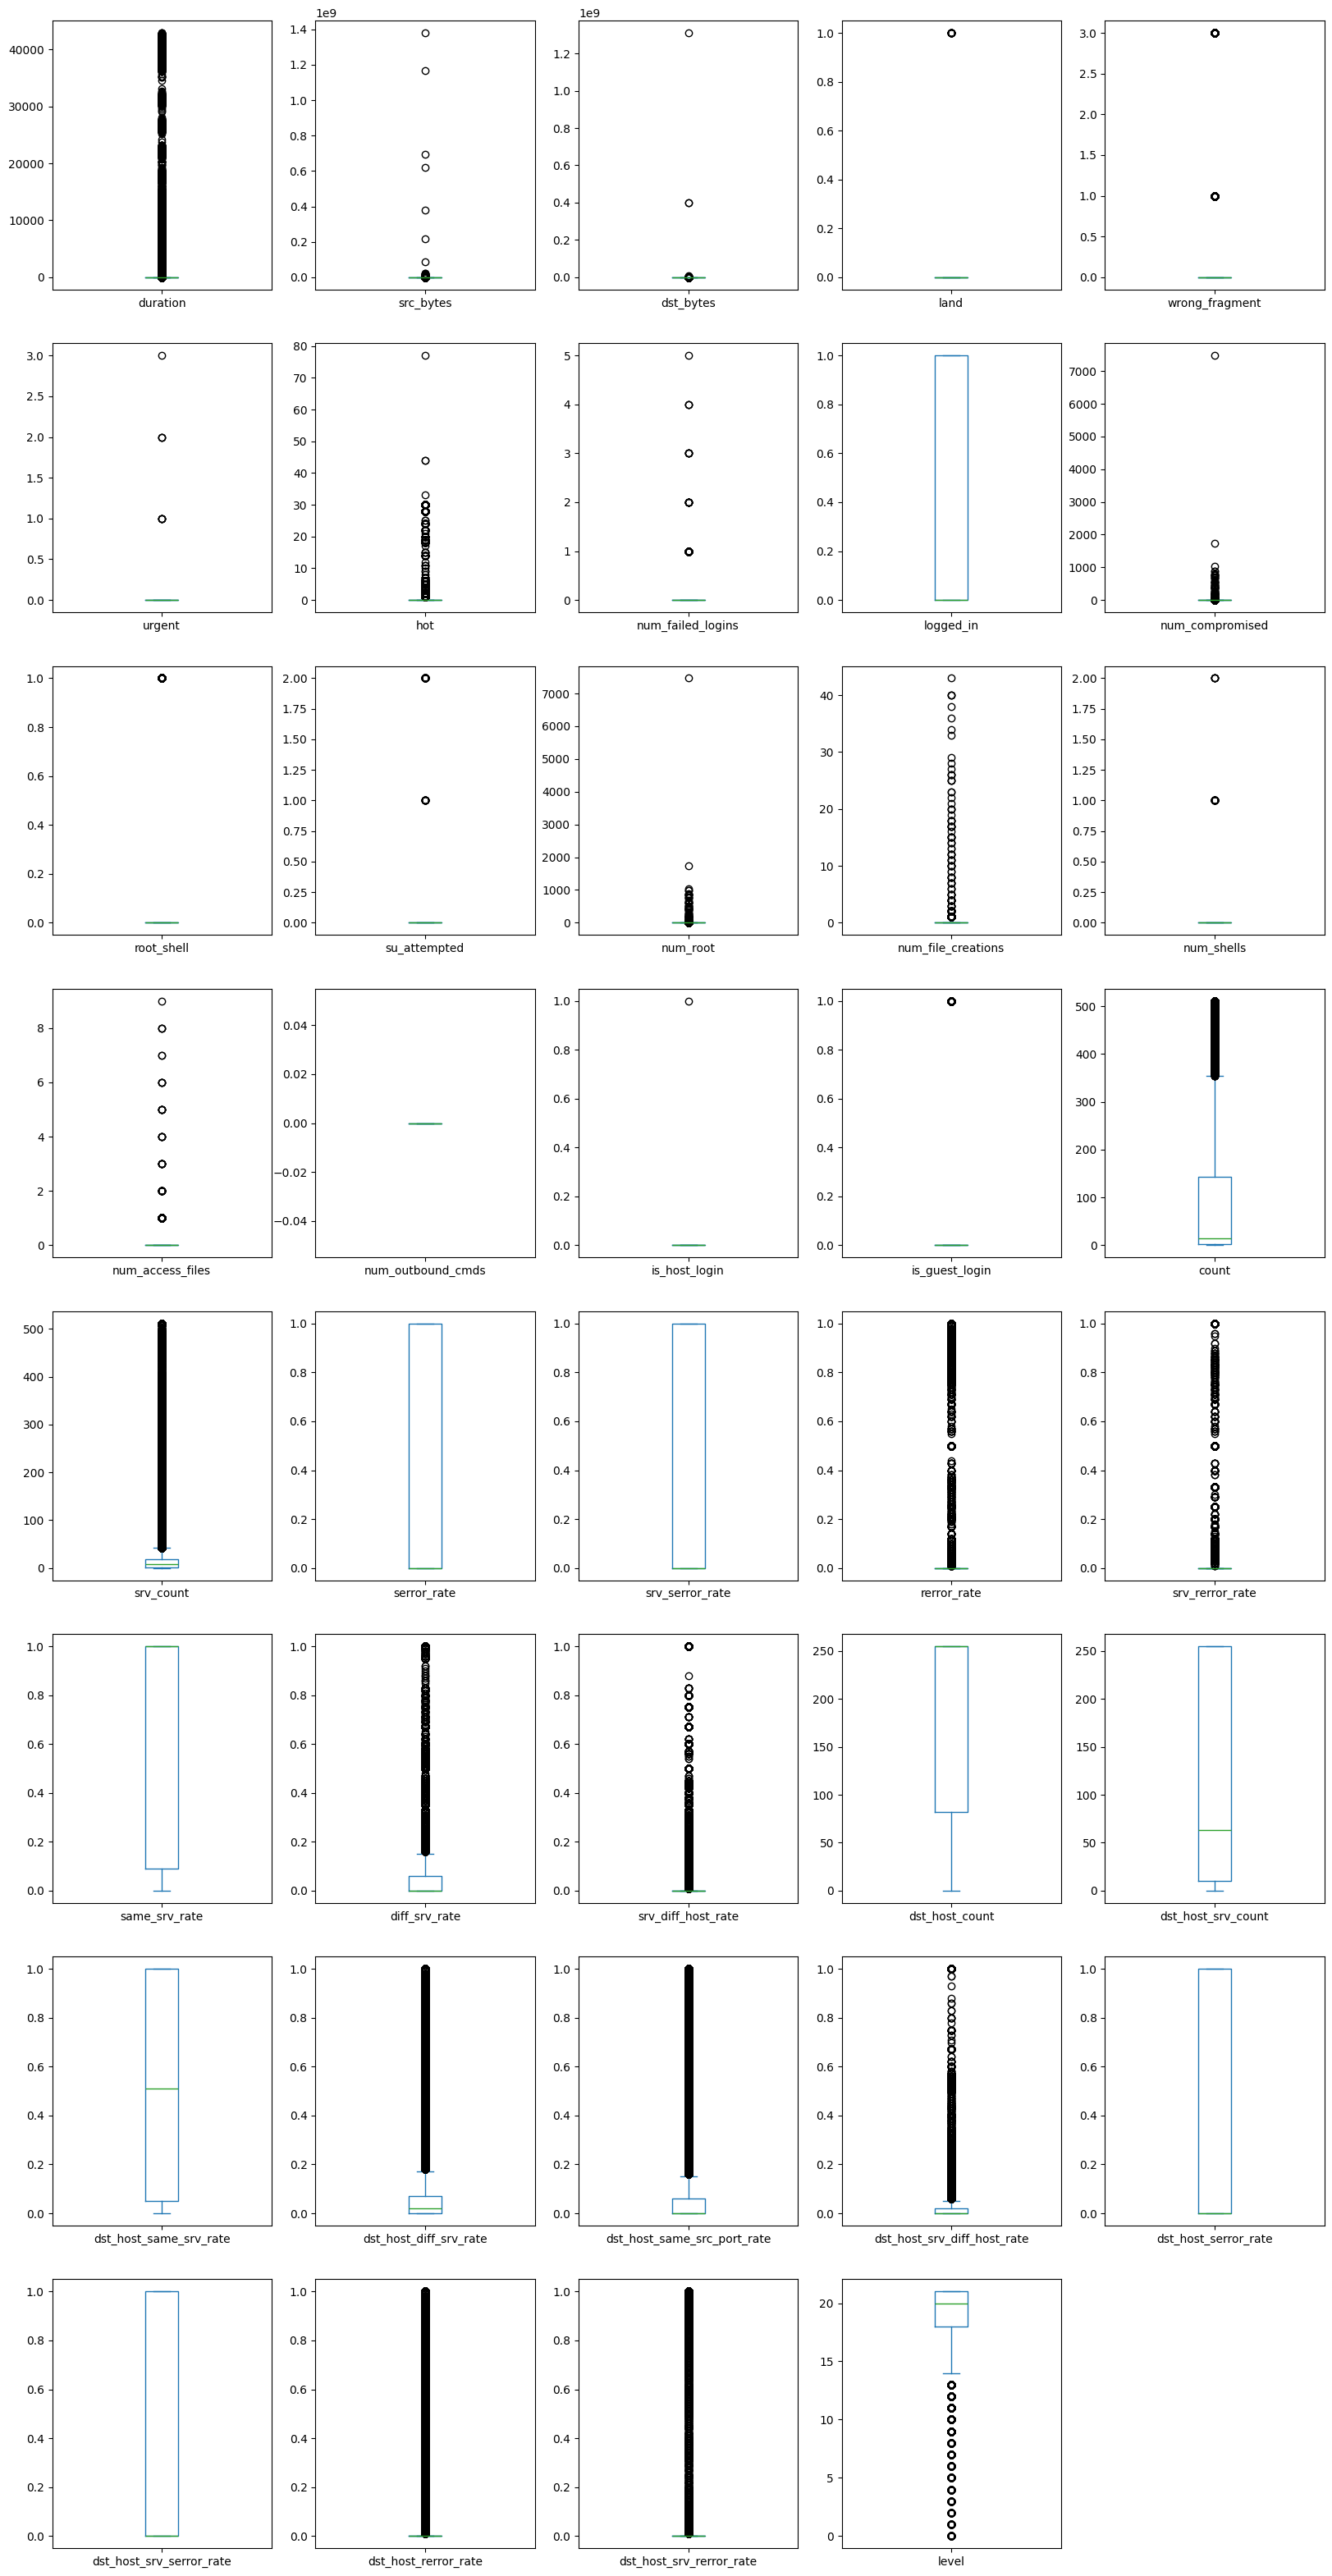

In [14]:
# plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

There is no too much outlier to misslead the model so i will not drop the outliers

用Letter-value plot判讀
Letter-value plot 是一種箱線圖的變體，它對於大型資料集的分布顯示更加精細，可以更詳細地展示尾部數據的分布情況，而不會像傳統箱線圖那樣將大部分尾部數據都歸為異常值。

In [15]:
!pip install seaborn
import seaborn as sns

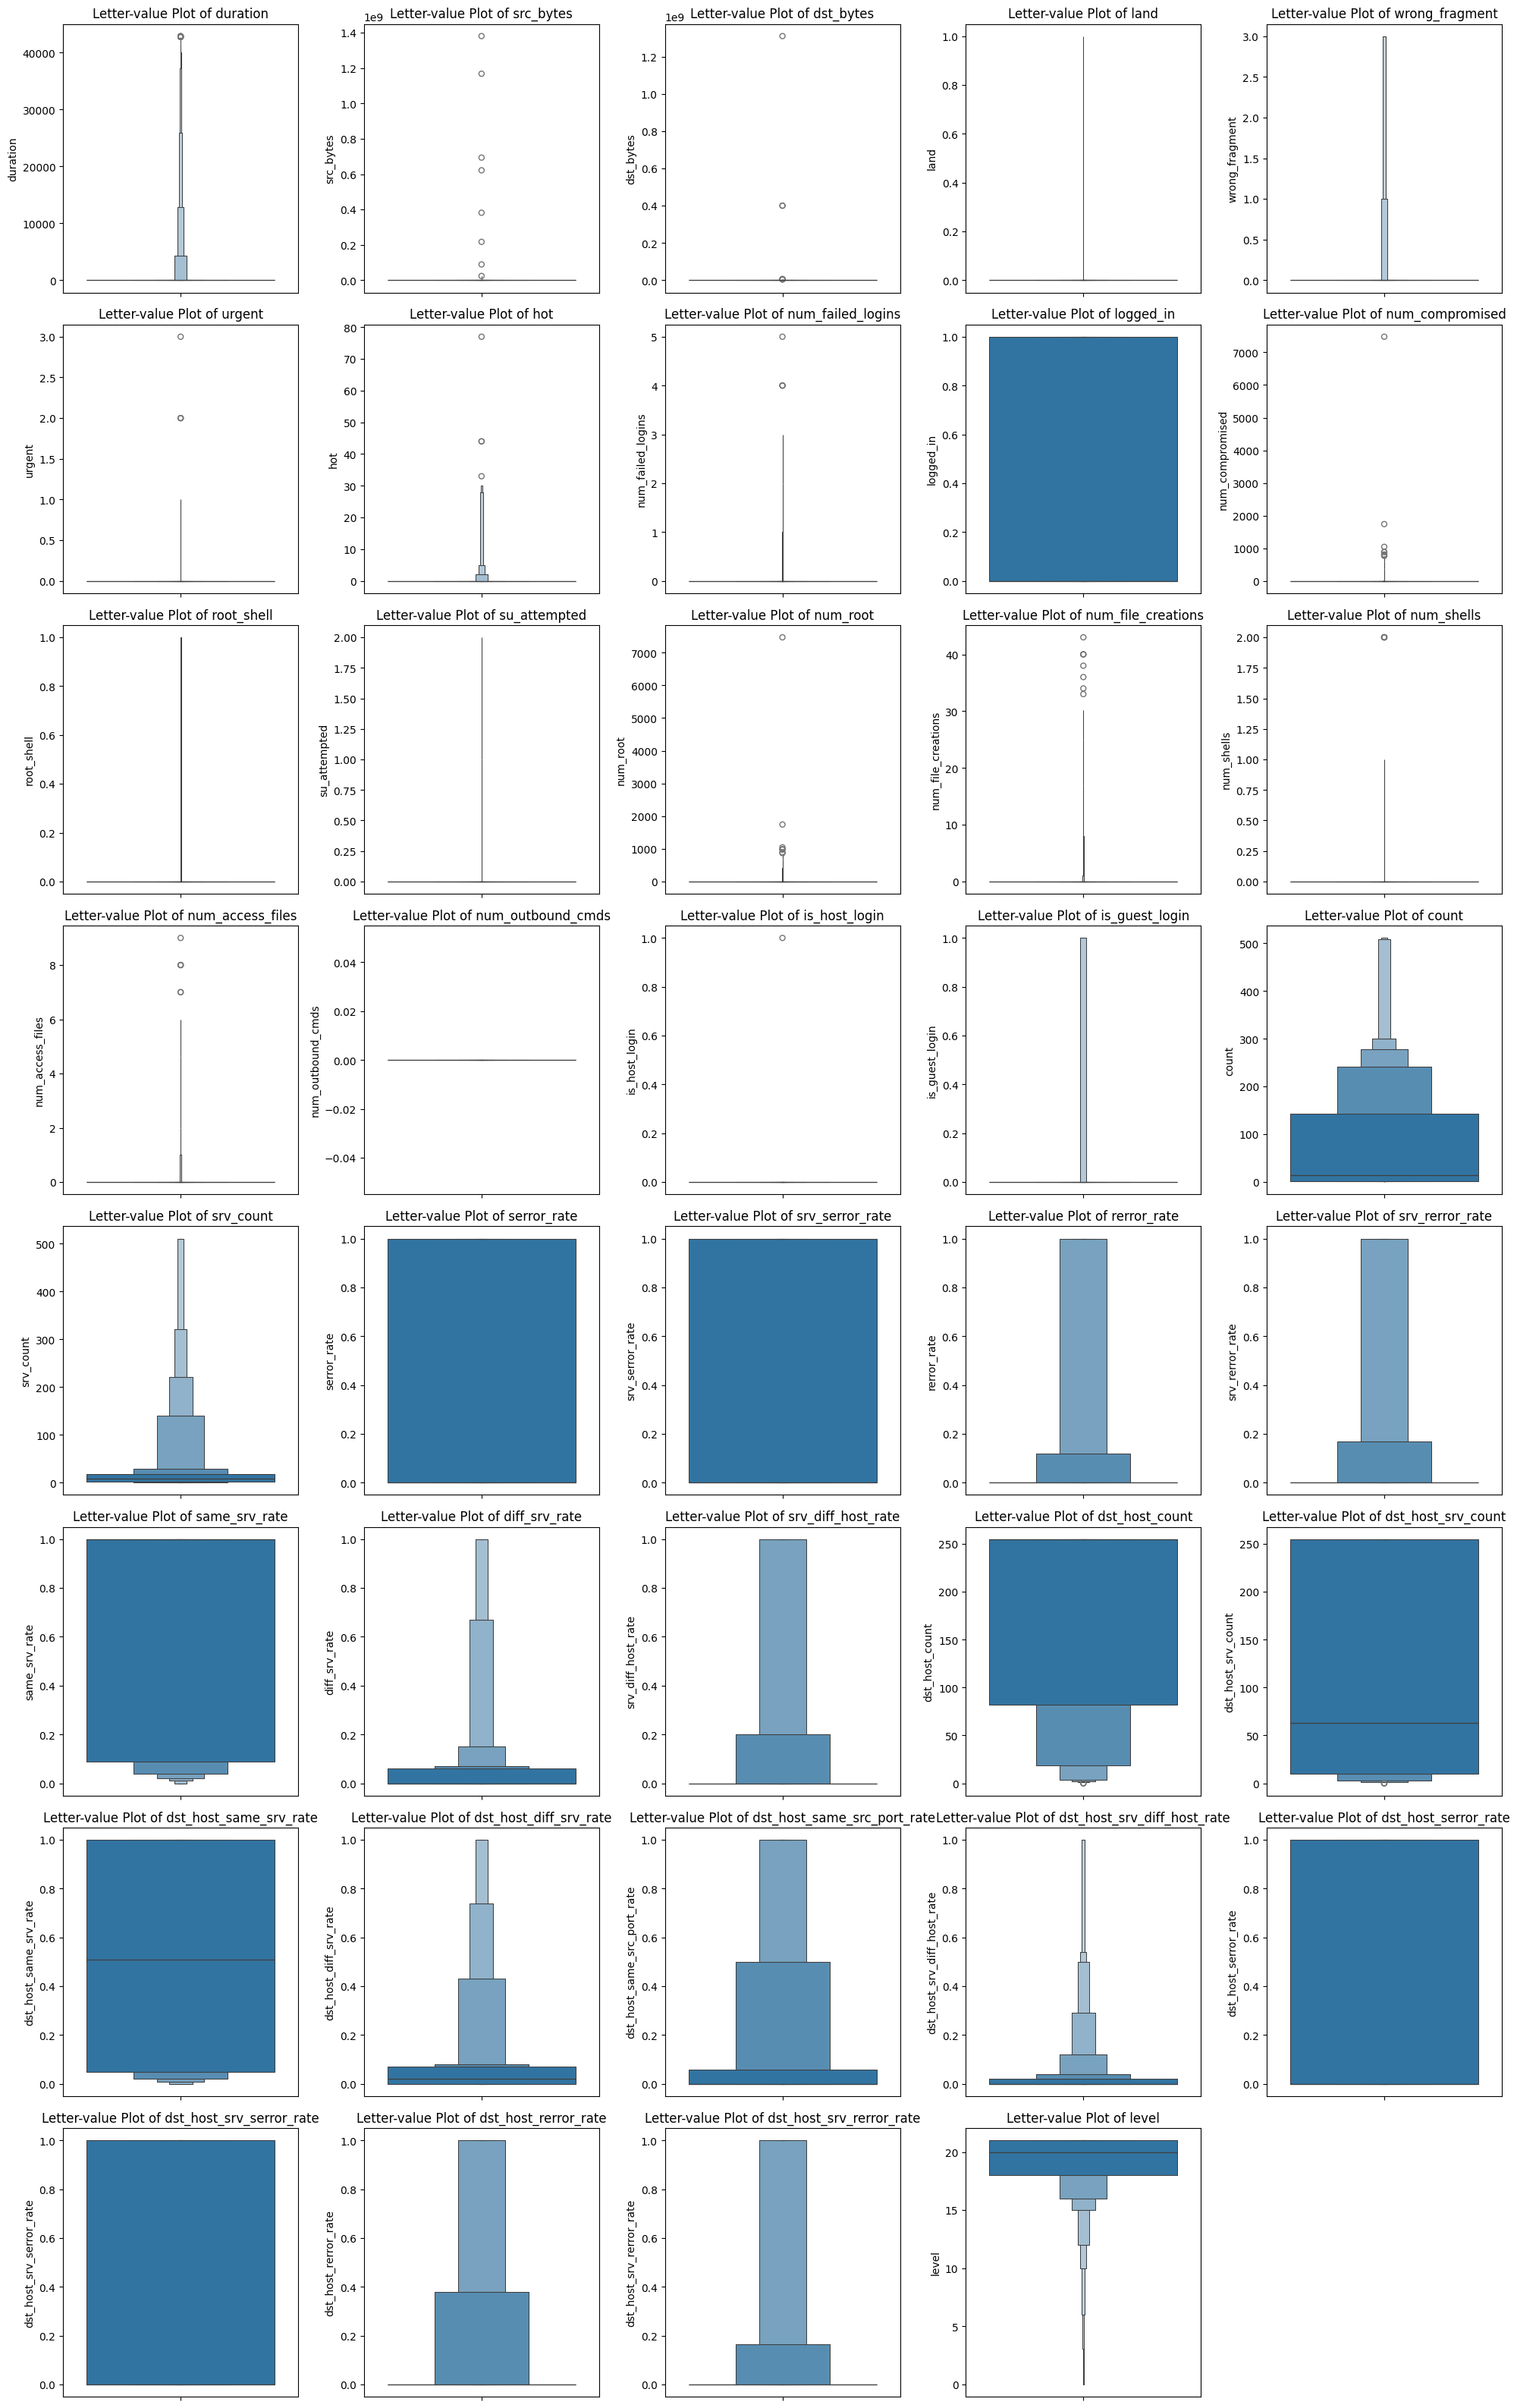

In [16]:
# 假設 df 是你已經讀取的 DataFrame
# 找出所有非 'object' 型別的數值型欄位
numeric_features = df.select_dtypes(include='number').columns
# 從數值型欄位中移除目標欄位 'attack' 和 'level' (如果不需要對它們繪製)
# numeric_features = numeric_features.drop(['attack', 'level'], errors='ignore')

# 設定子圖的佈局
n_cols = 5 # 每行顯示的子圖數量
n_rows = (len(numeric_features) + n_cols - 1) // n_cols # 計算需要的行數

# 設定整體圖形大小
plt.figure(figsize=(n_cols * 4, n_rows * 4)) # 根據子圖數量調整整體圖形大小

# 遍歷數值型欄位並繪製 Letter-value plot
for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1) # 創建子圖
    sns.boxenplot(y=df[col]) # 使用 seaborn.boxenplot 繪製 Letter-value plot
    plt.title(f'Letter-value Plot of {col}') # 添加子圖標題
    plt.ylabel(col) # 添加 Y 軸標籤

plt.tight_layout() # 自動調整子圖間距
plt.show() # 顯示圖形

# 3.4 CLASSIFY ATTACK OR NOT

In [17]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n

In [18]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

# 4. EDA - VISUALIZATIONS

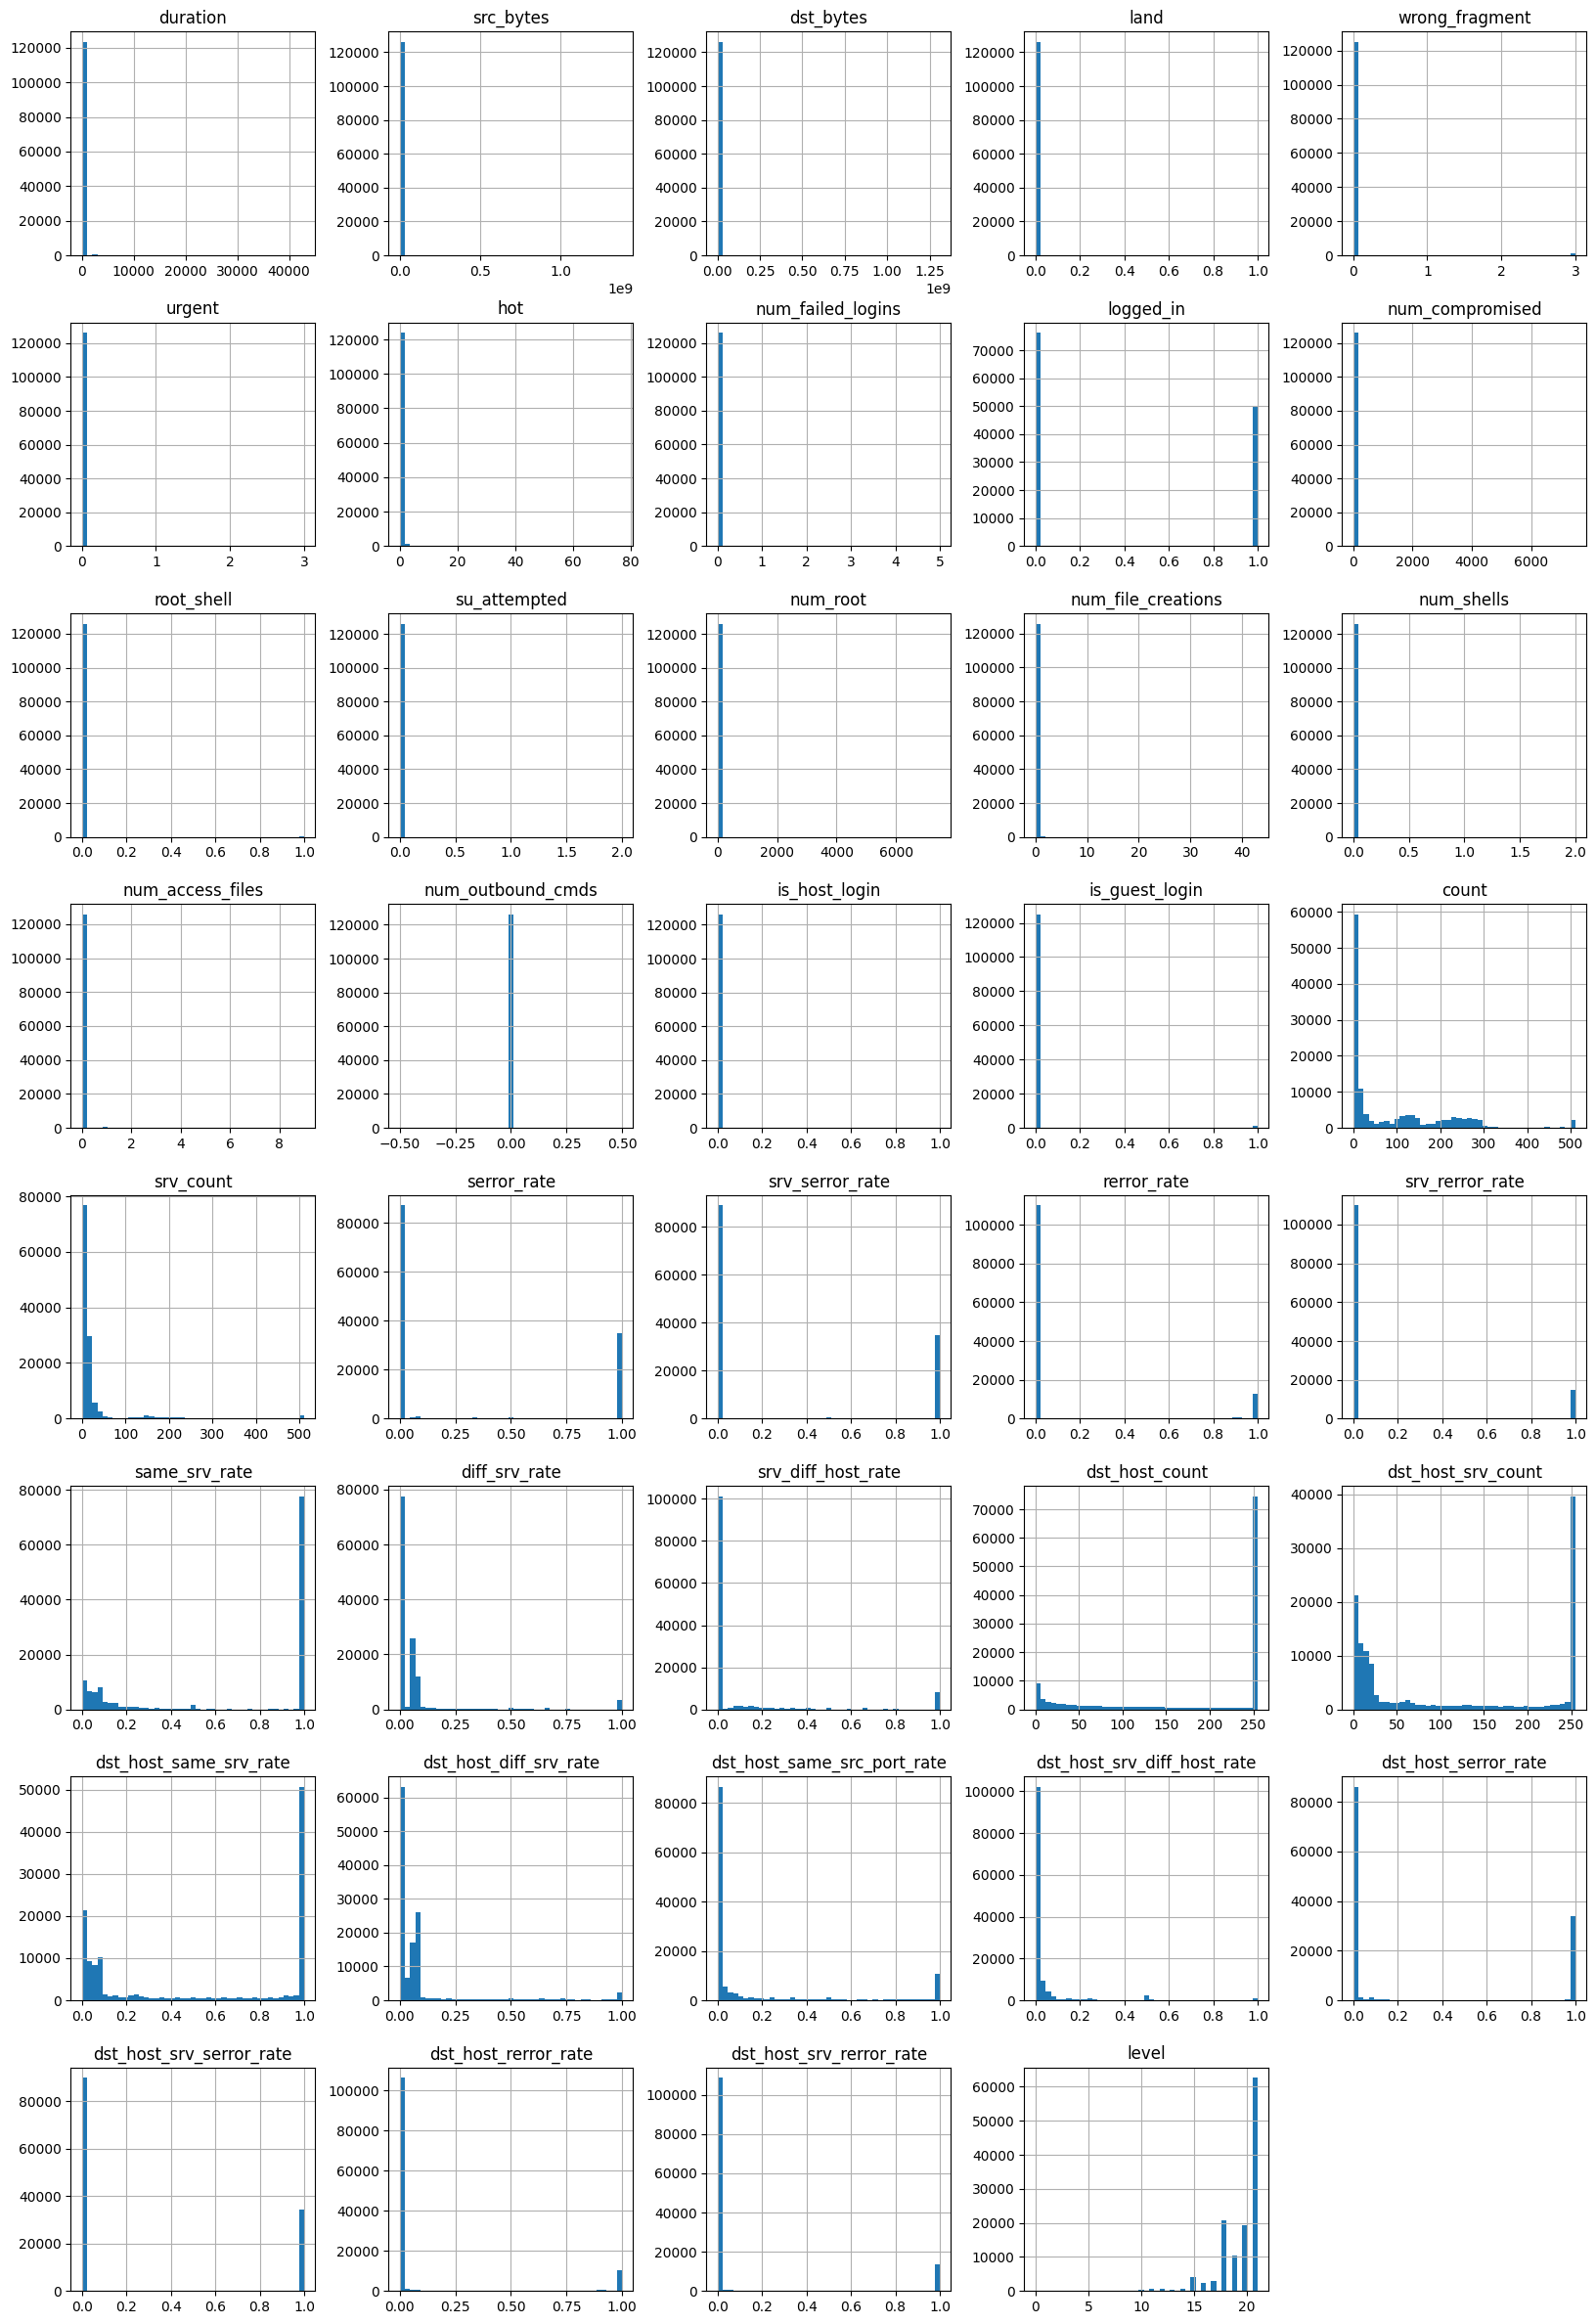

In [19]:
df.hist(bins=43,figsize=(20,30),layout=(8, 5));

General visualization in order to get insights

# 4.1 Protocol Type

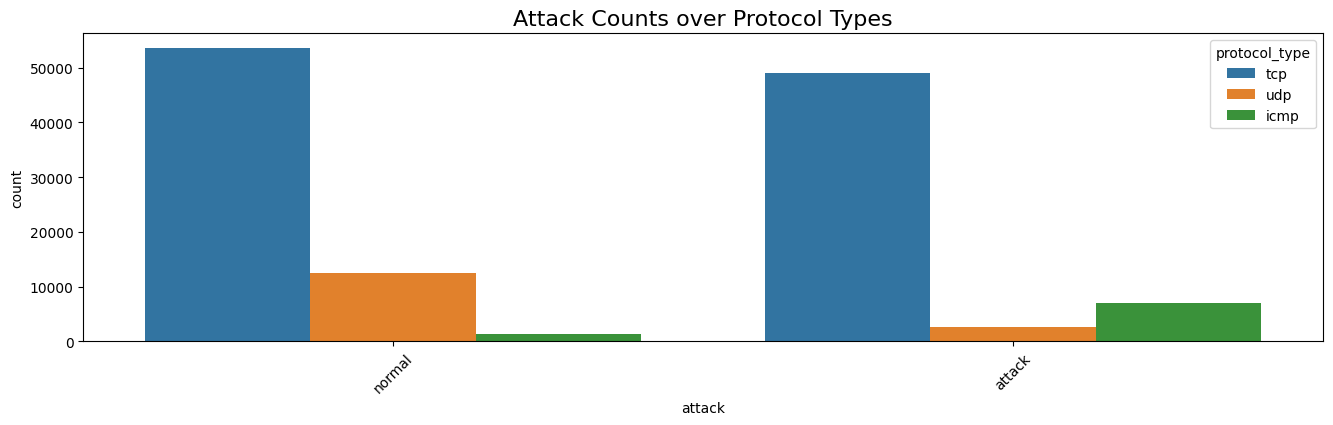

In [20]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type') # hue參數指定顏色分類
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [21]:
df["protocol_type"].value_counts(normalize=True)

,proportion
protocol_type,
tcp,0.815
udp,0.119
icmp,0.066


# 4.2 Service used general

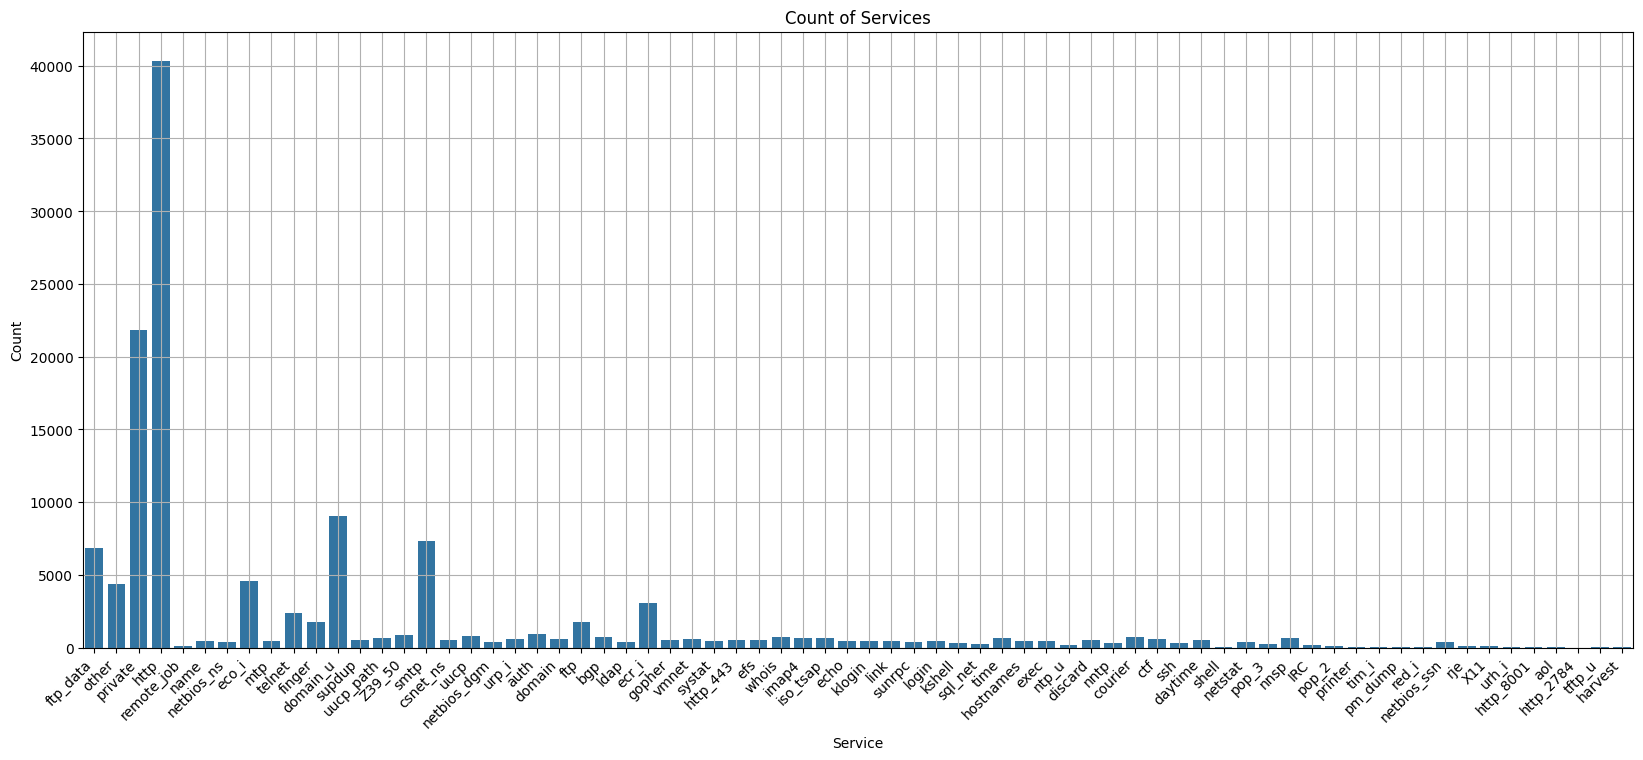

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


In [23]:
# Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

# 4.3 Service used effect on attacks

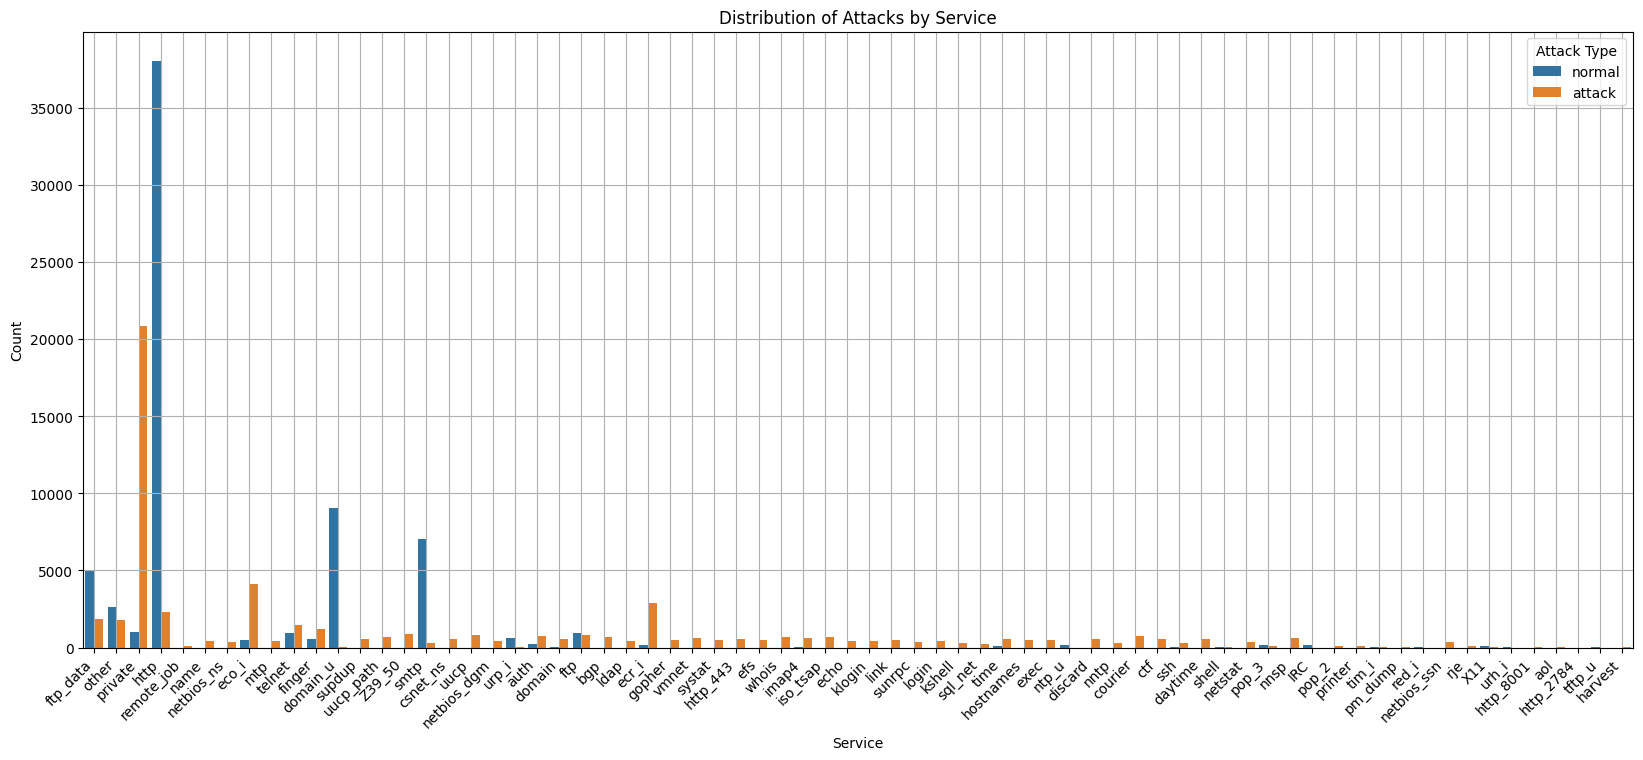

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


In [25]:
#we can see that private attacks is most common service

# 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

KDE=把長條圖畫成折線圖

<Figure size 1200x800 with 0 Axes>

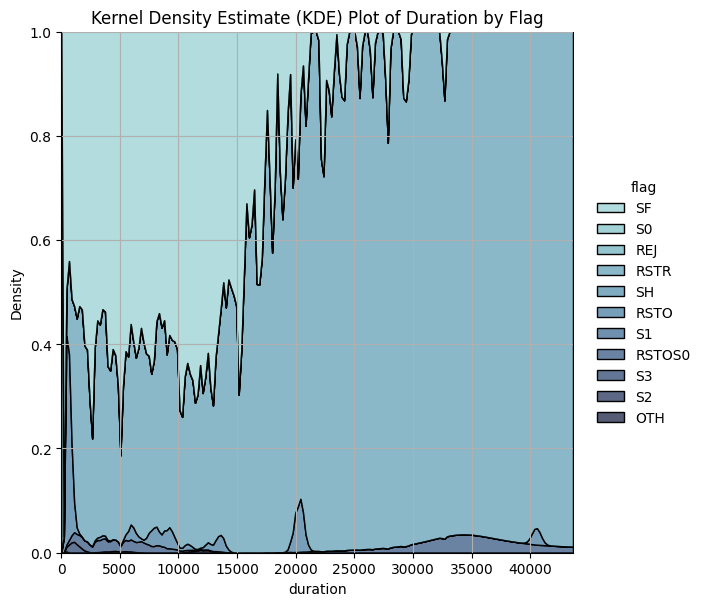

In [26]:

plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()


![image.png](
  https://www.researchgate.net/profile/Mir-Ahmad-4/publication/350955394/figure/fig4/AS:1013856331644929@1618733594714/Attributes-of-Flag-feature-in-NSL-KDD-Dataset.ppm
)

| Flag       | 數值 | 意義                                   |
| ---------- | -- | ------------------------------------ |
| **OTH**    | 1  | 沒有看到 SYN 封包，表示這不是一個正常的 TCP 連線初始化     |
| **REJ**    | 2  | 嘗試建立連線時被拒絕（如目標主機回傳 RST 封包）           |
| **RSTO**   | 3  | 被來源主機重置（reset）                       |
| **RSTOS0** | 4  | 來源送出 SYN，但未收到 SYN-ACK，因此回送 RST（重置）   |
| **RSTR**   | 5  | 被目標（目的端）重置（reset）                    |
| **S0**     | 6  | 看到了連線嘗試（SYN）但沒有收到回應                  |
| **S1**     | 7  | 連線已建立                                |
| **S2**     | 8  | 連線已建立，但來源主機試圖關閉                      |
| **S3**     | 9  | 連線已建立，但目的主機試圖關閉                      |
| **SF**     | 10 | 正常的 TCP 連線建立與終止                      |
| **SH**     | 11 | 連線半開（SYN 與 FIN 都送出，但無 RST 回應，通常代表異常） |


# 4.5 Distribution of Attack Types by Guest Login

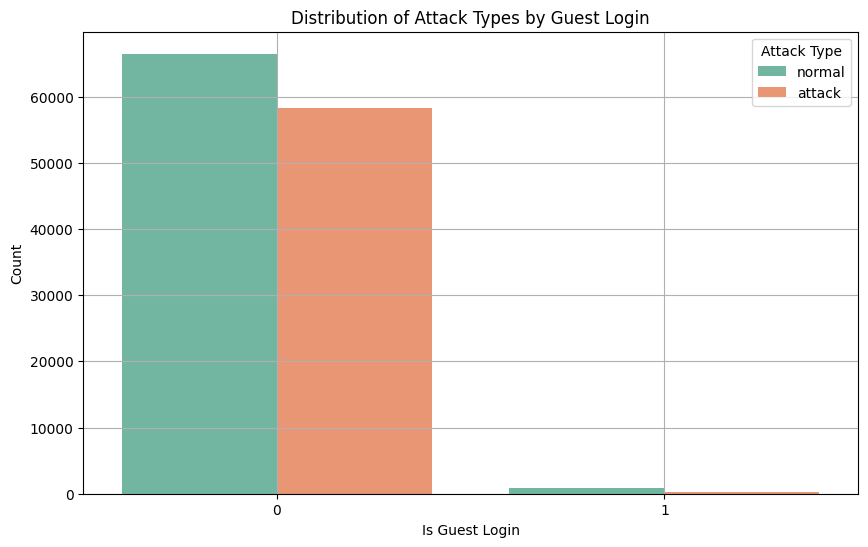

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

we can clearly say that attacks are comes when guest is not login

# 5. PREPROCESSING

# 5.1 ENCODING

In [28]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [29]:
# 用LabelEncoder()把object(類別型)型態的資料轉換成整數型態
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

# 5.2 TRAIN-TEST-SPLIT

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]
# 測試資料佔10%
# 數據是隨機分割的,不指定random_state,則每次執行這行程式碼，分割結果都會不同。
# 指定random_state, 可重現實驗結果
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43)

In [31]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

# 5.3 Feature Engineering

In [32]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

,0
src_bytes,0.566
service,0.469
dst_bytes,0.442
flag,0.370
same_srv_rate,0.367
diff_srv_rate,0.361
dst_host_srv_count,0.337
dst_host_same_srv_rate,0.312
logged_in,0.292
dst_host_serror_rate,0.286


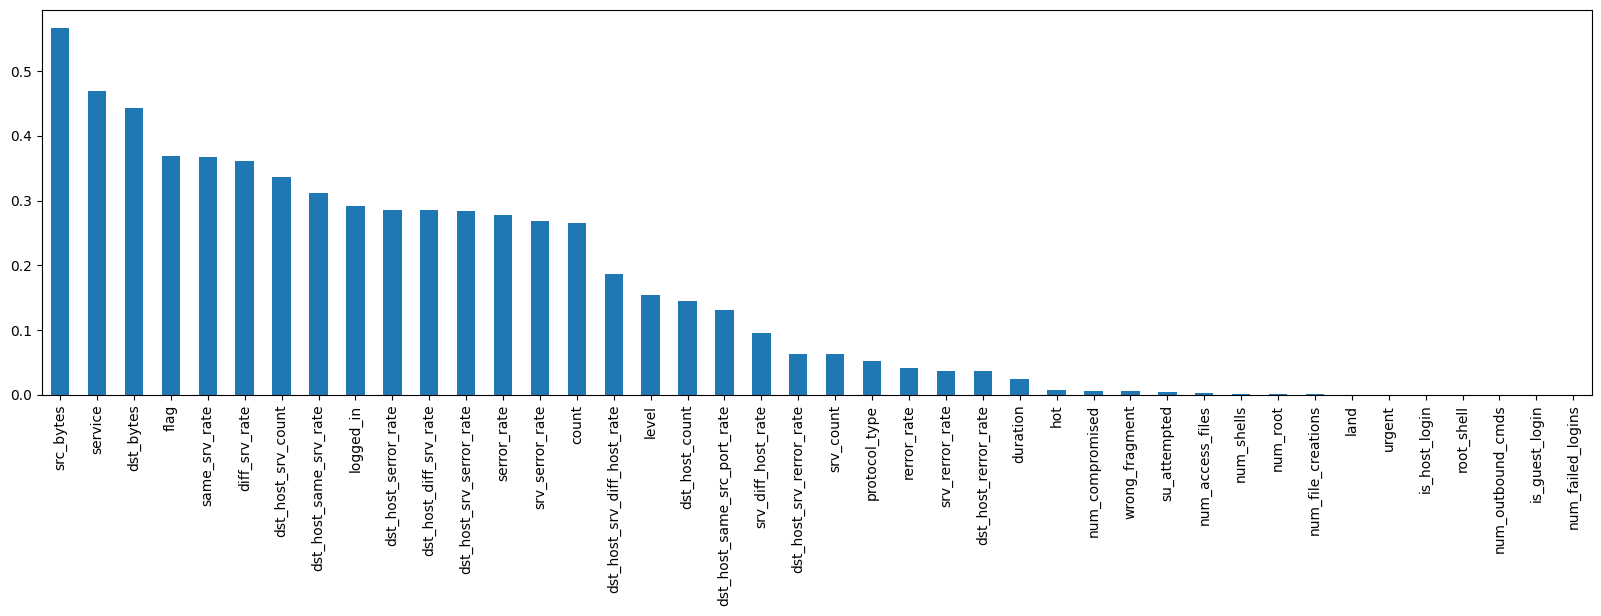

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

# 5.4 Feature Selection

！！！下面實際上沒有使用mutual_info_classif篩選的特徵！！！

In [34]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30) # 選擇與目標變數相關性最高的 K 個特徵
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [35]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

# 5.5 Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 針對X_test只使用 transform() 方法，而不是 fit_transform() 方法，是為了防止
# scaler 學習到X_test數據的統計信息
# X_test的transform() 只使用fit(X_train)學習到的分佈，進行scale

# 6. MODEL BUILD

In [37]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [38]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [39]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [40]:
Logistic = Logistic_model.fit(X_train,y_train)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [42]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

混淆矩陣 (Confusion Matrix)

混淆矩陣是一個 N x N 的矩陣，用於總結分類模型在預測集上的性能，其中 N 是目標變數的類別數量。對於二分類問題，混淆矩陣通常是 2x2 的，其結構如下：

| 預測值 \ 實際值 |	類別 0  (Negative) |類別 1 (Positive)|
| ---------- | -- | ------------------------------------ |
|預測為 類別 0 |	True Negative (TN) |	False Negative (FN) |
|預測為 類別 1 |	False Positive (FP)	|True Positive (TP)|

- True Positive (TP): 實際是類別 1，模型也預測為類別 1 (正確預測為攻擊)。
- True Negative (TN): 實際是類別 0，模型也預測為類別 0 (正確預測為正常)。
- False Positive (FP): 實際是類別 0，但模型預測為類別 1 (將正常誤判為攻擊，誤報)。
- False Negative (FN): 實際是類別 1，但模型預測為類別 0 (將攻擊誤判為正常，漏報)。

分類報告 (Classification Report)

分類報告提供了更詳細的分類性能指標，包括：

- Precision (精確度): 預測為類別 1 的樣本中，實際為類別 1 的比例。Precision = TP / (TP + FP)。在高精確度下，模型在預測為正類時，錯誤率較低。
- Recall (召回率) / Sensitivity (敏感度): 實際為類別 1 的樣本中，被模型正確預測為類別 1 的比例。Recall = TP / (TP + FN)。在高召回率下，模型能找到大部分實際的正類樣本。
- F1-score (F1分數): Precision 和 Recall 的調和平均數，是衡量模型綜合性能的指標。F1 = 2 * (Precision * Recall) / (Precision + Recall)。
- Support (支持度): 在測試集或訓練集中，該類別的實際樣本數量。
- Accuracy (準確度): 模型正確預測的樣本總數佔總樣本數的比例。Accuracy = (TP + TN) / (TP + TN + FP + FN)。
- Macro Avg (巨集平均): 計算每個類別的指標，然後取平均，不考慮類別的樣本數量差異。
- Weighted Avg (加權平均): 計算每個類別的指標，然後根據每個類別的支持度進行加權平均。

In [43]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[5500  390]
 [ 230 6478]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5890
           1       0.94      0.97      0.95      6708

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train_Set
[[49241  3499]
 [ 2149 58486]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     52740
           1       0.94      0.96      0.95     60635

    accuracy                           0.95    113375
   macro avg       0.95      0.95      0.95    113375
weighted avg       0.95      0.95      0.95    113375



解讀 Logistic_model 的輸出：

Test_Set:

- 混淆矩陣：
  - TN: 5500 (模型正確預測 5500 個正常連接)
  - FP: 390 (模型將 390 個正常連接誤判為攻擊)
  - FN: 230 (模型將 230 個攻擊連接誤判為正常)
  - TP: 6478 (模型正確預測 6478 個攻擊連接)
- 分類報告：
  - 類別 0 (正常): 精確度 0.96，召回率 0.93，F1 分數 0.95。表示模型在預測為正常時有 96% 的準確率，並且找到了 93% 的實際正常樣本。
  - 類別 1 (攻擊): 精確度 0.94，召回率 0.97，F1 分數 0.95。表示模型在預測為攻擊時有 94% 的準確率，並且找到了 97% 的實際攻擊樣本 (召回率很高，誤判為正常的攻擊較少)。
  - 整體準確度是 0.95 (95%)。
  
Train_Set:

- 訓練集的結果與測試集非常相似。
- 準確度、精確度、召回率和 F1 分數都與測試集上的值非常接近。
- 這表明羅吉斯迴歸模型在訓練集上並沒有過度擬合，它的泛化能力 (在測試集上的表現) 與在訓練集上的表現相似。

In [44]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[5883    7]
 [   6 6702]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00      6708

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52686    54]
 [   32 60603]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52740
           1       1.00      1.00      1.00     60635

    accuracy                           1.00    113375
   macro avg       1.00      1.00      1.00    113375
weighted avg       1.00      1.00      1.00    113375



解讀 XGBoost_model 的輸出：

Test_Set:

- 混淆矩陣：
  - TN: 5883 (模型正確預測 5883 個正常連接)
  - FP: 7 (模型將 7 個正常連接誤判為攻擊 - 非常低的誤報率)
  - FN: 6 (模型將 6 個攻擊連接誤判為正常 - 非常低的漏報率)
  - TP: 6702 (模型正確預測 6702 個攻擊連接)
- 分類報告：
  - 類別 0 (正常): 精確度 1.00，召回率 1.00，F1 分數 1.00。模型在預測為正常時幾乎沒有錯誤，並且找到了所有實際正常的樣本。
  - 類別 1 (攻擊): 精確度 1.00，召回率 1.00，F1 分數 1.00。模型在預測為攻擊時幾乎沒有錯誤，並且找到了所有實際攻擊的樣本。
  - 整體準確度是 1.00 (100%)。

Train_Set:

- 訓練集的結果也是接近完美。
- 準確度、精確度、召回率和 F1 分數都接近 1.00。
- 重要的觀察： XGBoost 模型在測試集上的性能 (幾乎所有指標都為 1.00) 遠遠優於羅吉斯迴歸模型。

So we can see that ensemble methods such as xgboost,adaboost,gradientboosts has more accurace scores over logistic regression in bigger datasets.

- XGBoost has cross-validation has itself (XGBoost 本身就包含了交叉驗證的功能): 指的是 XGBoost 庫在訓練過程中可以直接使用交叉驗證來評估模型性能，而無需單獨使用 scikit-learn 的交叉驗證函數。這提供了在訓練階段評估和選擇最佳迭代次數的便利

It doesn't neccessary but we will do hyperparameter tuning in order to fit the model with best parameters, i would like to remember that xgboost has cross-validation has itself

# 6.1 HYPERPARAMETER TUNING

超參數解釋 (針對 XGBoost):

- "n_estimators":

  - 樹的數量或提升階段的數量 [1]。越多樹通常能提高模型性能，但也可能增加過度擬合的風險和計算時間。你嘗試了 50, 64, 100, 128 棵樹。
- "max_depth":

  - 每棵樹的最大深度 [1]。深度越深，模型越能捕捉到複雜的關係，但也更容易過度擬合。你嘗試了深度為 2, 3, 4, 5, 6 的樹。
- "learning_rate" (或 eta):

  - 學習率或步長 [1]。控制每次迭代中對權重的更新幅度。較小的學習率通常需要更多樹來達到相同的性能，但可能獲得更好的結果。你嘗試了 0.01, 0.03, 0.05, 0.1。
- "subsample":

  - 用於訓練每棵樹的訓練樣本比例 [1]。例如，subsample=0.8 表示每棵樹隨機抽取 80% 的訓練樣本進行訓練。這有助於防止過度擬合。你嘗試了 0.5 和 0.8 的比例。
- "colsample_bytree":

  - 用於訓練每棵樹的特徵 (欄位) 比例 [1]。例如，colsample_bytree=0.8 表示每棵樹隨機抽取 80% 的特徵進行訓練。這也有助於防止過度擬合。你嘗試了 0.5 和 0.8 的比例。

In [45]:
# 以n_estimators為例，tuning時會嘗試設定為 50、64、100、128 這四個值
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [46]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [47]:
XGB_grid_model.best_score_

np.float64(0.9982697365006132)

In [48]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

# 6.2 FINAL MODEL

In [49]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 6.3 EVALUATION

In [50]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1]) # 使用切片 [:, 1] 來選取每個樣本屬於正類 (類別 1) 的概率


roc_auc_score是衡量分類模型區分正負類能力的指標，其值介於 0 到 1 之間，值越接近 1 表示模型性能越好。

In [58]:
print("F1 Score:", xgb_f1)
print("Recall:", xgb_recall)
print("AUC:", xgb_auc)

F1 Score: 0.99880810488677
Recall: 0.9994036970781157
AUC: 0.9999738294897611


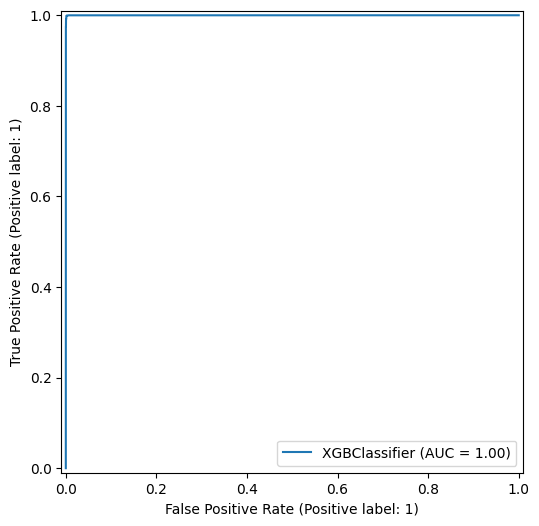

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

曲線幾乎貼著左邊和上邊，說明在任何閾值下，模型都能保持非常低的假陽性（FPR）與極高的真陽性（TPR）。

In [53]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[5878   12]
 [   4 6704]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00      6708

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52624   116]
 [   41 60594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52740
           1       1.00      1.00      1.00     60635

    accuracy                           1.00    113375
   macro avg       1.00      1.00      1.00    113375
weighted avg       1.00      1.00      1.00    113375



# 7. FEATURE IMPORTANCE

評估和視覺化 XGBoost 模型中各個特徵的重要性。這有助於理解模型在進行預測時，哪些特徵對結果的貢獻最大。

XGBoost 模型 (以及許多基於樹的模型，如隨機森林) 在訓練過程中會計算每個特徵在構建所有樹時的「重要性」。重要性的計算方式可以有多種，例如基於特徵在分裂節點時的增益 (gain)、覆蓋度 (cover) 或頻率 (frequency) [1]。預設通常是基於增益

In [54]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
logged_in,0.232
src_bytes,0.168
protocol_type,0.134
flag,0.105
dst_bytes,0.092
count,0.045
wrong_fragment,0.041
serror_rate,0.037
service,0.032
hot,0.028


In [55]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [56]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'normal', ..., 'normal', 'attack', 'normal'],
      dtype=object)

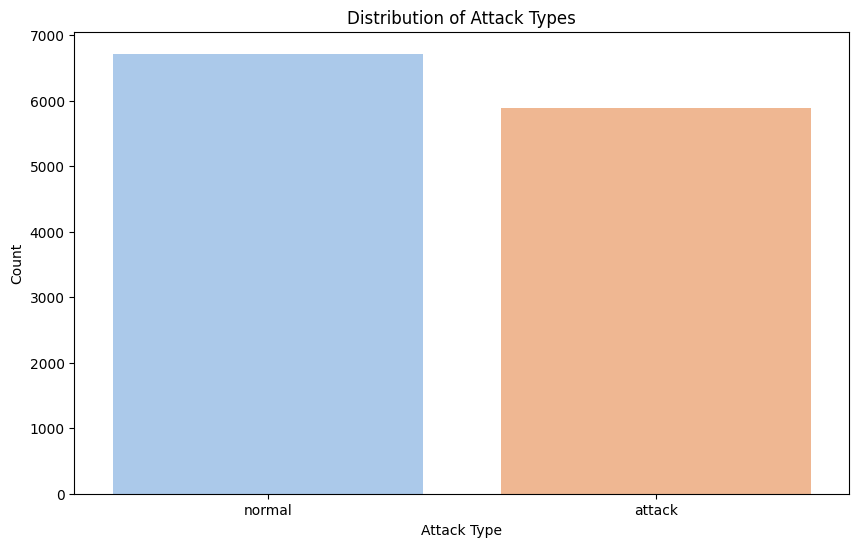

In [57]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()